In [1]:
# Import libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 

In [2]:
%matplotlib inline

In [3]:
# Import dataset
ai_salaries= pd.read_csv(r'C:/Users/ab-fv/OneDrive/Documentos/Achievement 6 DA/Modified Data/ai_salaries2.csv', index_col = False)

In [4]:
ai_salaries.columns

Index(['job_id', 'job_title', 'salary_usd', 'salary_currency',
       'experience_level', 'employment_type', 'company_location',
       'company_size', 'employee_residence', 'remote_ratio', 'required_skills',
       'education_required', 'years_experience', 'industry', 'posting_date',
       'benefits_score'],
      dtype='object')

In [6]:
# Standardize data
def standardize_numerical_columns(ai_salaries):
    numeric_cols = ['salary_usd', 'years_experience', 'benefits_score']
    scaler = StandardScaler()
    data = ai_salaries[numeric_cols]
    standardized_values = scaler.fit_transform(data)
    standardized_df = pd.DataFrame(standardized_values, columns=numeric_cols, index=ai_salaries.index)
    return standardized_df

In [7]:
standardized_df = standardize_numerical_columns(ai_salaries)

In [8]:
# Elbow technique
num_cl = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [9]:
score = [kmeans[i].fit(standardize_numerical_columns(ai_salaries)).score(standardize_numerical_columns(ai_salaries)) for i in range(len(kmeans))]
score

[-44999.999999999935,
 -25711.372740468447,
 -17571.009268645073,
 -15115.275728848825,
 -12319.811848311016,
 -11006.353114784444,
 -9647.548552894115,
 -8403.816291437644,
 -7681.446199315555]

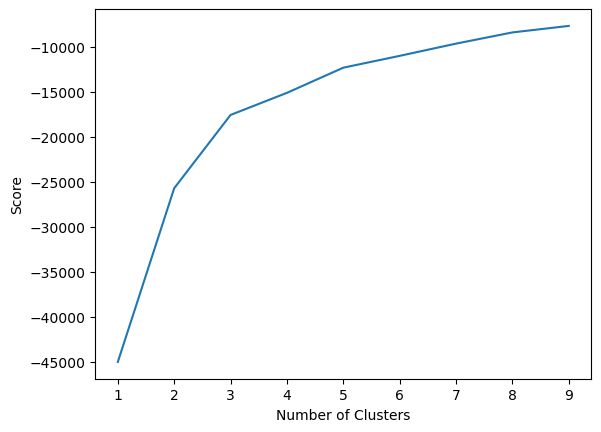

In [10]:
# Plot the elbow curve to find number of clusters

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.show()

In [11]:
# Number of clusters: 5, because after that, the curve straightens out

In [12]:
# k-means algorithm
kmeans = KMeans(n_clusters = 5) 

In [14]:
# Fit the k-means object to the data.
kmeans.fit(standardized_df)

KMeans(n_clusters=5)

In [15]:
standardized_df['clusters'] = kmeans.fit_predict(standardized_df)

In [16]:
standardized_df.head()

,salary_usd,years_experience,benefits_score,clusters
0,-0.414428,0.495313,-1.105769,2
1,-0.887071,-0.947276,-1.588254,4
2,0.618614,-0.766953,1.306658,0
3,-0.583050,0.134666,0.755246,0
4,-1.007734,-1.127600,-0.623284,4


In [17]:
standardized_df['clusters'].value_counts()

clusters
0    4873
4    4282
2    2603
3    2003
1    1239
Name: count, dtype: int64

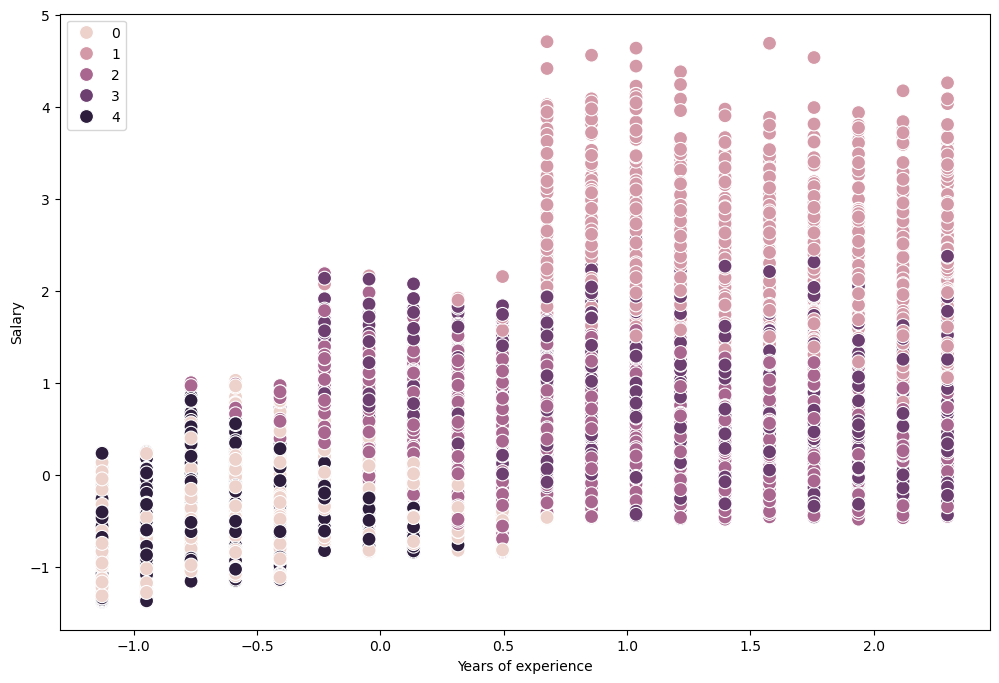

In [18]:
# Plot clusters variables salary-years of experience
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=standardized_df['years_experience'], y=standardized_df['salary_usd'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Years of experience') 
plt.ylabel('Salary') 
plt.savefig(r'C:/Users/ab-fv/OneDrive/Documentos/Achievement 6 DA/Visualizations/6.5plot_years-salary.png')
plt.show()

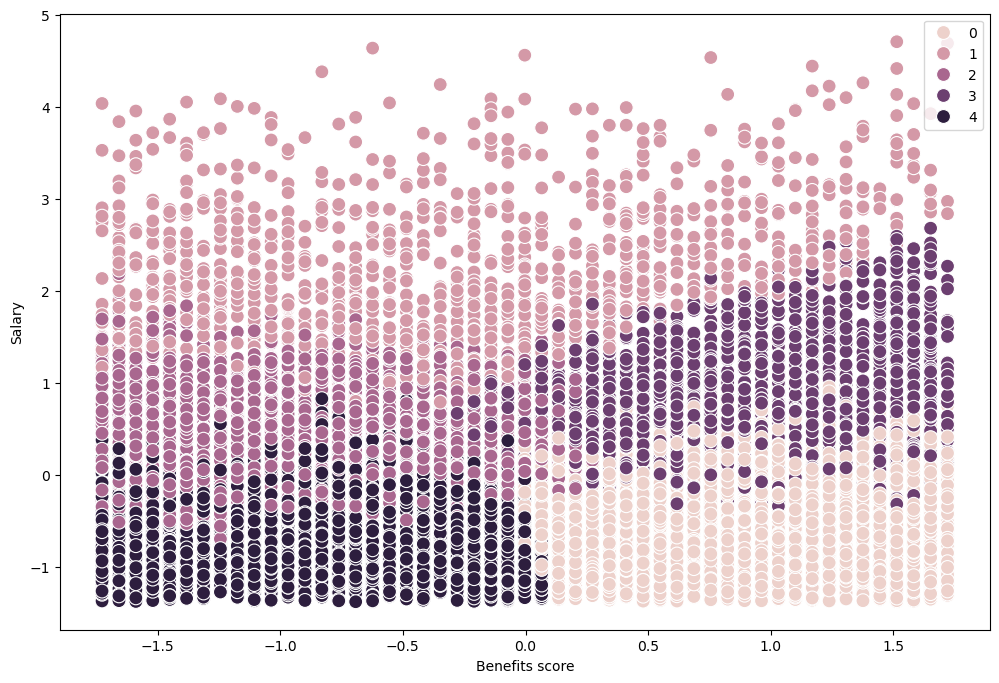

In [19]:
# Plot clusters variables salary-benefits
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=standardized_df['benefits_score'], y=standardized_df['salary_usd'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Benefits score') 
plt.ylabel('Salary') 
plt.savefig(r'C:/Users/ab-fv/OneDrive/Documentos/Achievement 6 DA/Visualizations/6.5plot_salary-benefits.png')
plt.show()

In [ ]:
# The clusrters don't make a lot of sense, especially the first plot. I will try with different number of clusters

In [20]:
kmeans = KMeans(n_clusters = 3) 

In [21]:
# Fit the k-means object to the data.
kmeans.fit(standardized_df)

KMeans(n_clusters=3)

In [22]:
standardized_df['clusters'] = kmeans.fit_predict(standardized_df)

In [23]:
standardized_df['clusters'].value_counts()

clusters
2    5845
1    4873
0    4282
Name: count, dtype: int64

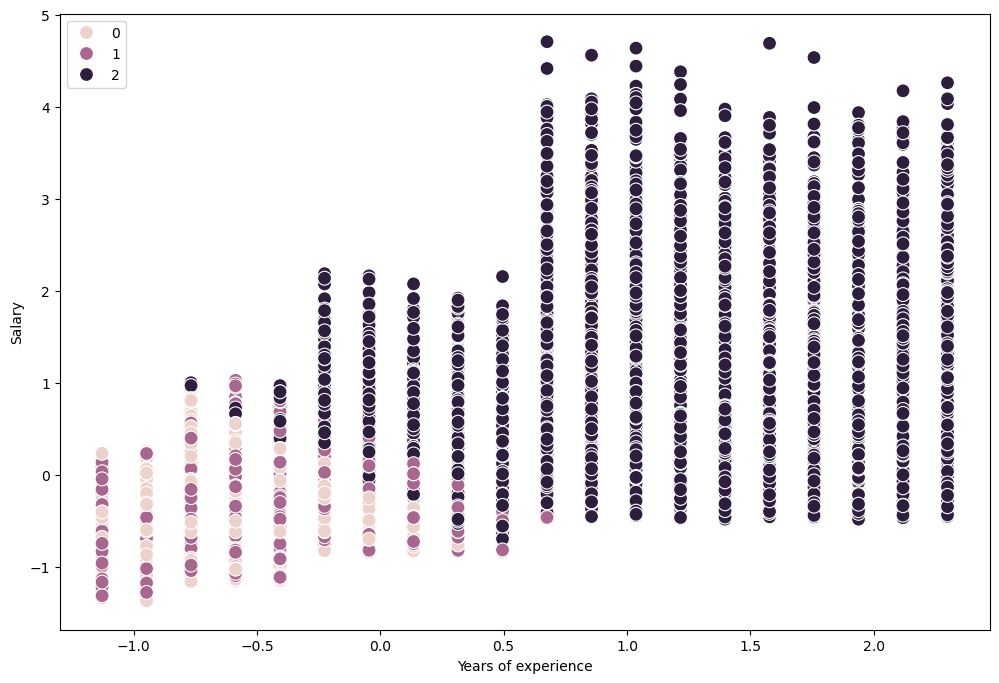

In [24]:
# Plot clusters variables salary-years of experience
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=standardized_df['years_experience'], y=standardized_df['salary_usd'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Years of experience') 
plt.ylabel('Salary') 
plt.savefig(r'C:/Users/ab-fv/OneDrive/Documentos/Achievement 6 DA/Visualizations/6.5plot_years-salary2.png')
plt.show()

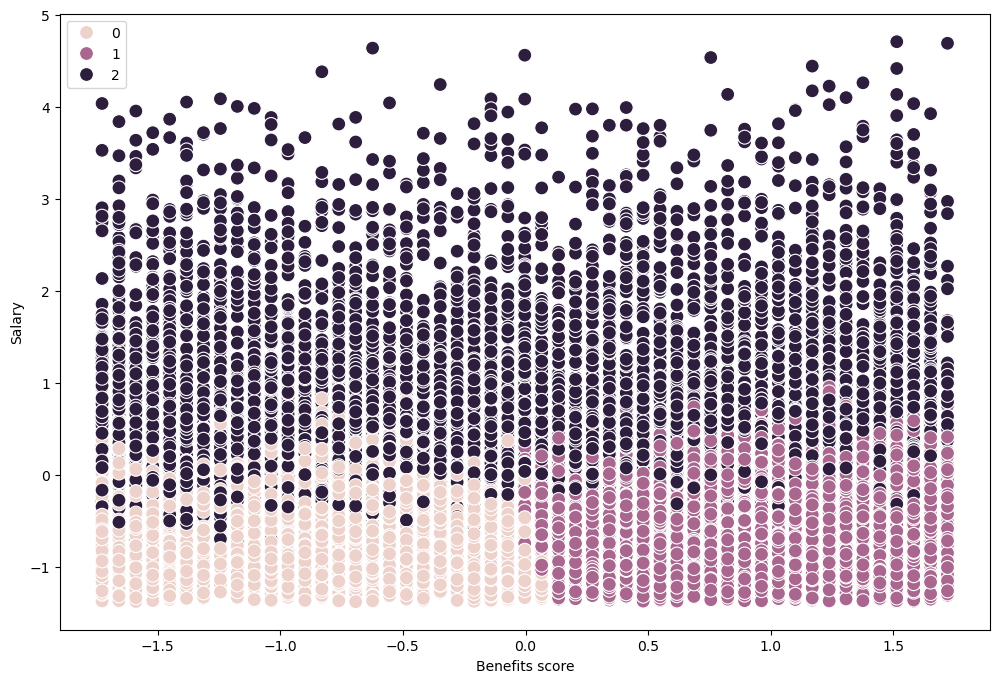

In [25]:
# Plot clusters variables salary-benefits
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=standardized_df['benefits_score'], y=standardized_df['salary_usd'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Benefits score') 
plt.ylabel('Salary') 
plt.savefig(r'C:/Users/ab-fv/OneDrive/Documentos/Achievement 6 DA/Visualizations/6.5plot_salary-benefits2.png')
plt.show()

In [ ]:
# With 3 clusters, the data makes more sense. The first plot with salary-years of experience shows a linear relationship. The plot
with salary and benefits, shows a horizontal split and there's a weak correlation

In [ ]:
# Descriptive statistics

In [26]:
standardized_df.loc[standardized_df['clusters'] == 2, 'cluster'] = 'dark purple'
standardized_df.loc[standardized_df['clusters'] == 1, 'cluster'] = 'purple'
standardized_df.loc[standardized_df['clusters'] == 0, 'cluster'] = 'pink'

In [27]:
standardized_df.groupby('cluster').agg({'salary_usd':['mean', 'median'], 
                         'years_experience':['mean', 'median'], 
                         'benefits_score':['mean', 'median']})

salary_usd           years_experience           benefits_score  \
                  mean    median             mean    median           mean   
cluster                                                                      
dark purple   0.927158  0.743758         1.028726  1.036284      -0.122650   
pink         -0.642987 -0.688877        -0.730273 -0.766953      -0.843858   
purple       -0.547089 -0.592376        -0.592217 -0.586629       0.888629   

                       
               median  
cluster                
dark purple -0.209725  
pink        -0.830063  
purple       0.893099

In [ ]:
# Findings
Cluster dark purple has the highest salary and years of experience but below average benefits
Cluster pink has the lowest salary and least years of experience. Benefits are the worst. Maybe entry level
Cluster purple is the middle range with the best benefits score

In [ ]:
#Future analysis
These results could be useful for future compensation planning or benefits strategy